In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from solvers import util


In [2]:
drones_3_8_combined= pd.read_excel('ADMM_mpc_3_to_8_agents.xlsm', sheet_name='Sheet1')

In [3]:
drones_3_8_combined= drones_3_8_combined.replace(to_replace='None', value=np.nan).dropna()

In [4]:
drones_3_8_combined.columns

Index(['i_trial', 'n_agents', 'converged', 'obj_trj', 'T', 'dt', 'radius',
       '         centralized', 't_solve_avg', 'dist_to_goal'],
      dtype='object')

In [5]:
drones_3_8_combined.columns = ['i_trial', 'n_agents', 'converged', 'obj_trj', 'T', 'dt', 'radius','centralized', 't_solve_avg', 'dist_to_goal']

In [6]:
drones_3_8_combined.columns

Index(['i_trial', 'n_agents', 'converged', 'obj_trj', 'T', 'dt', 'radius',
       'centralized', 't_solve_avg', 'dist_to_goal'],
      dtype='object')

In [7]:
drones_3_8_combined.head()

,i_trial,n_agents,converged,obj_trj,T,dt,radius,centralized,t_solve_avg,dist_to_goal
0,0,3,True,197.453164,8,0.1,0.5,True,0.332790,[0.03759331 0.09814742 0.09446549]
1,0,3,True,197.832783,8,0.1,0.5,False,0.317238,[0.03728136 0.09761212 0.09637602]
2,1,3,True,249.896239,8,0.1,0.5,True,0.334810,[0.02274464 0.08605 0.08310829]
3,1,3,True,253.552008,8,0.1,0.5,False,0.335808,[0.02276489 0.09066409 0.07937561]
4,2,3,True,232.584638,8,0.1,0.5,True,0.333809,[0.04566557 0.0153753 0.07470644]


In [8]:
drones_3_8_combined['normalized_t_solve'] = drones_3_8_combined['t_solve_avg']/drones_3_8_combined['obj_trj']

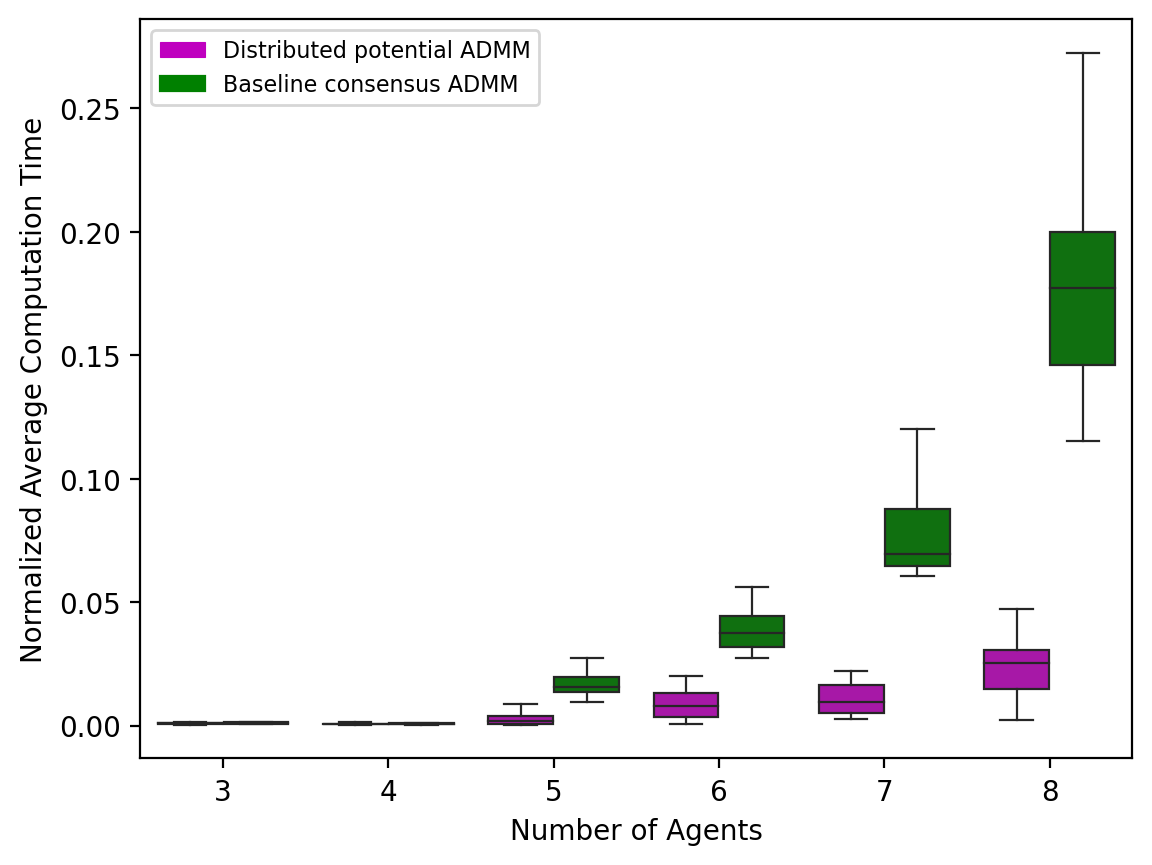

In [9]:
plt.figure(dpi=200)
sns.boxplot(data=drones_3_8_combined, x="n_agents", y="normalized_t_solve", hue='centralized', palette=["m", "g"], showfliers=False,linewidth=0.8)
legend =  plt.legend(['Distributed potential ADMM','Baseline consensus ADMM'],fontsize=8)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('m')
leg.legendHandles[1].set_color('g')
plt.ylabel('Normalized Average Computation Time');
plt.xlabel('Number of Agents');
plt.savefig('ADMM_avg_computation_time.png')

In [10]:
df = drones_3_8_combined

In [33]:
df_try = df.replace(to_replace='None', value=np.nan).dropna()

In [34]:
solve_time_comparison = df_try.groupby(['centralized','n_agents']).agg({'normalized_t_solve': ['mean']})

In [35]:
solve_time_comparison.columns = ['avg_solve_time'] 

In [36]:
solve_time_comparison

avg_solve_time
centralized n_agents                
False       3               0.001003
            4               0.000723
            5               0.003520
            6               0.008427
            7               0.015382
            8               0.037437
True        3               0.001054
            4               0.000826
            5               0.016789
            6               0.038888
            7               0.077755
            8               0.177152

In [37]:
solve_time_comparison = solve_time_comparison.reset_index()

In [38]:
solve_time_comparison

,centralized,n_agents,avg_solve_time
0,False,3,0.001003
1,False,4,0.000723
2,False,5,0.003520
3,False,6,0.008427
4,False,7,0.015382
5,False,8,0.037437
6,True,3,0.001054
7,True,4,0.000826
8,True,5,0.016789
9,True,6,0.038888


In [39]:
centralized_solve_times = solve_time_comparison.loc[solve_time_comparison['centralized']==True]

In [40]:
decentralized_solve_times = solve_time_comparison.loc[solve_time_comparison['centralized']==False]

In [41]:
np.abs(centralized_solve_times['avg_solve_time'].values-decentralized_solve_times['avg_solve_time'].values) / centralized_solve_times['avg_solve_time'].values

array([0.04860365, 0.1250202 , 0.79034558, 0.78329751, 0.8021785 ,
       0.78867474])

In [42]:
optimality_df = df_try.groupby(['centralized','n_agents']).agg({'obj_trj': ['mean', 'var']})

In [43]:
optimality_df

obj_trj              
                            mean           var
centralized n_agents                          
False       3         359.922514  16552.729230
            4         614.383665  44816.440210
            5         575.245133  22945.144129
            6         635.256312  18051.736623
            7         802.787204  39138.650071
            8         863.354599  43107.391861
True        3         355.063161  15363.936059
            4         567.198066  43356.118714
            5         556.047813  25817.203569
            6         595.070415  18964.454900
            7         747.502618  30274.855821
            8         803.730421  48868.716268

In [44]:
optimality_df.columns=['mean_value','var_value']

In [45]:
optimality_df = optimality_df.reset_index()

In [46]:
optimality_df

,centralized,n_agents,mean_value,var_value
0,False,3,359.922514,16552.729230
1,False,4,614.383665,44816.440210
2,False,5,575.245133,22945.144129
3,False,6,635.256312,18051.736623
4,False,7,802.787204,39138.650071
5,False,8,863.354599,43107.391861
6,True,3,355.063161,15363.936059
7,True,4,567.198066,43356.118714
8,True,5,556.047813,25817.203569
9,True,6,595.070415,18964.454900


In [47]:
centralized_results = optimality_df.loc[optimality_df['centralized']==True]

In [48]:
decentralized_results = optimality_df.loc[optimality_df['centralized']==False]

In [49]:
centralized_results

,centralized,n_agents,mean_value,var_value
6,True,3,355.063161,15363.936059
7,True,4,567.198066,43356.118714
8,True,5,556.047813,25817.203569
9,True,6,595.070415,18964.454900
10,True,7,747.502618,30274.855821
11,True,8,803.730421,48868.716268


In [50]:
decentralized_results

,centralized,n_agents,mean_value,var_value
0,False,3,359.922514,16552.729230
1,False,4,614.383665,44816.440210
2,False,5,575.245133,22945.144129
3,False,6,635.256312,18051.736623
4,False,7,802.787204,39138.650071
5,False,8,863.354599,43107.391861


In [51]:
relative_gap = np.abs(decentralized_results['mean_value'].values - centralized_results['mean_value'].values)/centralized_results['mean_value'].values
relative_gap

array([0.01368588, 0.08319069, 0.03452458, 0.06753133, 0.07395905,
       0.0741843 ])

In [52]:
success_count=df.groupby(['centralized','n_agents'])['converged'].value_counts()

In [53]:
success_count

centralized  n_agents  converged
False        3         True         25
                       False         5
             4         True         20
                       False         9
             5         True         29
                       False         2
             6         True         18
                       False         4
             7         True         12
                       False         3
             8         True         12
                       False         8
True         3         True         25
                       False         5
             4         True         23
                       False         6
             5         True         29
                       False         2
             6         True         22
             7         True         13
                       False         2
             8         True         16
                       False         4
Name: converged, dtype: int64

In [54]:
success_count_df = pd.DataFrame(success_count)

In [55]:
success_count_df=success_count_df.rename(columns={'converged':'count'})

In [56]:
success_count_df

count
centralized n_agents converged       
False       3        True          25
                     False          5
            4        True          20
                     False          9
            5        True          29
                     False          2
            6        True          18
                     False          4
            7        True          12
                     False          3
            8        True          12
                     False          8
True        3        True          25
                     False          5
            4        True          23
                     False          6
            5        True          29
                     False          2
            6        True          22
            7        True          13
                     False          2
            8        True          16
                     False          4

In [57]:
success_count_df = success_count_df.reset_index()

In [58]:
success_decentralized = success_count_df.loc[success_count_df['centralized']==False]

In [59]:
success_decentralized.sum()

centralized      0
n_agents        66
converged        6
count          147
dtype: int64

In [60]:
success_decentralized.loc[success_decentralized['converged']==True].sum()

centralized      0
n_agents        33
converged        6
count          116
dtype: int64

In [61]:
success_rate_decentralized = 104 / 138
success_rate_decentralized

0.7536231884057971

In [62]:
success_centralized = success_count_df.loc[success_count_df['centralized']==True]

In [63]:
success_centralized.sum()

centralized     11
n_agents        60
converged        6
count          147
dtype: int64

In [64]:
success_centralized.loc[success_centralized['converged']==True].sum()

centralized      6
n_agents        33
converged        6
count          128
dtype: int64

In [65]:
success_rate_centralized = 114 / 138
success_rate_centralized

0.8260869565217391

In [66]:
np.linalg.inv(np.diag([1, 1, 2]))

array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 0.5]])

### Comparison w/ DP-ilQR:

In [52]:
dpilqr_3_to_8_agents = pd.read_excel('dpilqr_3_to_8_Agents.xlsm', sheet_name='Sheet1')

In [53]:
dpilqr_3_to_8_agents.head()

,n_agents,trial,centralized,last,J,horizon,dt,converged,times,dist_to_goal
0,3,0,False,True,561.252990,8,0.1,True,0.023242,"[0.07124665534428853, 0.027163722763951046, 0...."
1,3,1,False,True,933.584800,8,0.1,True,0.051770,"[0.09366098149691533, 0.08010242508551062, 0.0..."
2,3,2,False,True,453.596531,8,0.1,True,0.010628,"[0.06377821295268277, 0.04166296450383314, 0.0..."
3,3,3,False,True,806.756891,8,0.1,True,0.024992,"[0.0790861841727646, 0.05619133784852748, 0.04..."
4,3,4,False,True,1457.068627,8,0.1,True,0.111667,"[0.04551504735202634, 0.01952101851573597, 0.0..."


In [54]:
dpilqr_3_to_8_agents = dpilqr_3_to_8_agents.loc[dpilqr_3_to_8_agents['converged']==True]

In [55]:
dpilqr_objectives = dpilqr_3_to_8_agents['J']

In [61]:
dpilqr_objectives

0        561.252990
1        933.584800
2        453.596531
3        806.756891
4       1457.068627
           ...     
232    60229.681637
233    46841.067731
234     5008.281334
235    37792.587435
236    23642.845375
Name: J, Length: 192, dtype: float64

: 

In [57]:
potential_admm_objectives = df.loc[df['converged']==True]

In [58]:
potential_admm_objectives = potential_admm_objectives['obj_trj']

In [59]:
potential_admm_objectives

0       197.453164
1       197.832783
2       249.896239
3       253.552008
4       232.584638
          ...     
288     664.450063
289     749.108478
290     750.121478
291     767.114496
292    1291.860381
Name: obj_trj, Length: 244, dtype: float64

In [48]:
frame = {'admm_objectives':potential_admm_objectives.values,
         'dpilqr_objectives':dpilqr_objectives.values}

In [49]:
comparison_df = pd.DataFrame(frame)

ValueError: All arrays must be of the same length

In [ ]:
comparison_df

,admm_objectives,dpilqr_objectives
0,197.453164,197.453164
1,197.832783,197.832783
2,249.896239,249.896239
3,253.552008,253.552008
4,232.584638,232.584638
...,...,...
289,749.108478,749.108478
290,750.121478,750.121478
291,767.114496,767.114496
292,1291.860381,1291.860381


In [1]:
from casadi import *
opti = Opti()

In [3]:
X = opti.variable(18,20+1)

In [4]:
X[:,0].shape

(18, 1)

In [5]:
T = 20
nx = 18
nu = 9

In [6]:
Y_state = opti.variable((T+1)*nx + T*nu)

In [7]:
Y_state[:(T+1)*nx][0*nx:(0+1)*nx].shape

(18, 1)

In [9]:
Y_state[(T+1)*nx:][0*nu:(0+1)*nu].shape

(9, 1)

In [13]:
x0,xr = util.paper_setup_3_quads()


In [14]:
xr.shape

(18, 1)

In [17]:
np.array([0, 0, 9.8] *3).shape

(3, 3)